In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [89]:
df = pd.read_csv('./datasets/GlobalLandTemperaturesByCity.csv')
df.head(5)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [90]:
# df_model = df.drop(['AverageTemperatureUncertainty', 'Country'], axis=1)
# df_model = df.drop(['AverageTemperatureUncertainty', 'City', 'Country'], axis=1)
df_model = df.copy()

In [91]:
df_model.dt = pd.to_datetime(df_model.dt)
df_model.dt.dtype

dtype('<M8[ns]')

In [ ]:
# interpolated=df.interpolate(limit_direction="both")
# print(interpolated)

In [92]:
df_model['date_year'] = df_model.dt.dt.year
df_model['date_month'] = df_model.dt.dt.month

In [93]:
df_model.drop(['dt'], axis=1, inplace=True)

In [94]:
df_model.head(20)

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,date_year,date_month
0,6.068,1.737,Århus,Denmark,57.05N,10.33E,1743,11
1,NaN,NaN,Århus,Denmark,57.05N,10.33E,1743,12
2,NaN,NaN,Århus,Denmark,57.05N,10.33E,1744,1
3,NaN,NaN,Århus,Denmark,57.05N,10.33E,1744,2
4,NaN,NaN,Århus,Denmark,57.05N,10.33E,1744,3
5,5.788,3.624,Århus,Denmark,57.05N,10.33E,1744,4
6,10.644,1.283,Århus,Denmark,57.05N,10.33E,1744,5
7,14.051,1.347,Århus,Denmark,57.05N,10.33E,1744,6
8,16.082,1.396,Århus,Denmark,57.05N,10.33E,1744,7
9,NaN,NaN,Århus,Denmark,57.05N,10.33E,1744,8


In [95]:
def map_latitude(lat):
    if(lat[-1] == 'N'):
        return float(lat[:-1])
    elif (lat[-1] == 'S'):
        return -float(lat[:-1])
    else:
        return 0

def map_longitude(lat):
    if(lat[-1] == 'E'):
        return float(lat[:-1])
    elif (lat[-1] == 'W'):
        return -float(lat[:-1])
    else:
        return 0

In [96]:
df_model['Latitude'] = df_model['Latitude'].apply(map_latitude)
df_model['Longitude'] = df_model['Longitude'].apply(map_longitude)

In [97]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 8 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   AverageTemperature             float64
 1   AverageTemperatureUncertainty  float64
 2   City                           object 
 3   Country                        object 
 4   Latitude                       float64
 5   Longitude                      float64
 6   date_year                      int64  
 7   date_month                     int64  
dtypes: float64(4), int64(2), object(2)
memory usage: 524.9+ MB


In [98]:
df_model.isna().sum()

AverageTemperature               364130
AverageTemperatureUncertainty    364130
City                                  0
Country                               0
Latitude                              0
Longitude                             0
date_year                             0
date_month                            0
dtype: int64

In [99]:
df_model.describe()

,AverageTemperature,AverageTemperatureUncertainty,Latitude,Longitude,date_year,date_month
count,8.235082e+06,8.235082e+06,8.599212e+06,8.599212e+06,8.599212e+06,8.599212e+06
mean,1.672743e+01,1.028575e+00,2.567540e+01,3.023881e+01,1.907345e+03,6.496369e+00
std,1.035344e+01,1.129733e+00,2.286185e+01,7.213002e+01,6.559949e+01,3.450679e+00
min,-4.270400e+01,3.400000e-02,-5.224000e+01,-1.511300e+02,1.743000e+03,1.000000e+00
25%,1.029900e+01,3.370000e-01,1.366000e+01,-4.430000e+00,1.860000e+03,3.000000e+00
50%,1.883100e+01,5.910000e-01,3.135000e+01,3.204000e+01,1.911000e+03,6.000000e+00
75%,2.521000e+01,1.349000e+00,4.259000e+01,8.825000e+01,1.962000e+03,9.000000e+00
max,3.965100e+01,1.539600e+01,6.992000e+01,1.769500e+02,2.013000e+03,1.200000e+01


In [100]:
df_model.shape

(8599212, 8)

In [101]:
df_model = df_model[df_model['date_year'] >= 1950].reset_index(drop=True)
df_model.isna().sum()

AverageTemperature               3070
AverageTemperatureUncertainty    3070
City                                0
Country                             0
Latitude                            0
Longitude                           0
date_year                           0
date_month                          0
dtype: int64

In [102]:
df_model.shape

(2685150, 8)

In [111]:
df_model['AverageTemperature'] =  df_model.groupby(['City', 'date_month'])['AverageTemperature'].apply(lambda x: x.fillna(x.mean()))
# df_model['Average Temperature'] =  df_model.groupby(['City', 'date_month'], group_keys=True)['AverageTemperature'].apply(lambda x: x.fillna(x.mean()))
df_model.head()

C:\Users\predator\AppData\Local\Temp\ipykernel_7292\2156706967.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  df_model['Average Temperature'] =  df_model.groupby(['City', 'date_month'])['AverageTemperature'].apply(lambda x: x.fillna(x.mean()))


,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,date_year,date_month,Average Temperature
2474,-0.712,0.280,Århus,Denmark,57.05,10.33,1950,1,-0.712
2475,1.423,0.218,Århus,Denmark,57.05,10.33,1950,2,1.423
2476,4.166,0.266,Århus,Denmark,57.05,10.33,1950,3,4.166
2477,6.743,0.310,Århus,Denmark,57.05,10.33,1950,4,6.743
2478,12.714,0.246,Århus,Denmark,57.05,10.33,1950,5,12.714


In [128]:
df['AverageTemperature'].iloc[26104]

nan

In [127]:
df_model['AverageTemperature'].iloc[26104]

23.42

In [112]:
df_model.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,date_year,date_month,Average Temperature
2474,-0.712,0.280,Århus,Denmark,57.05,10.33,1950,1,-0.712
2475,1.423,0.218,Århus,Denmark,57.05,10.33,1950,2,1.423
2476,4.166,0.266,Århus,Denmark,57.05,10.33,1950,3,4.166
2477,6.743,0.310,Århus,Denmark,57.05,10.33,1950,4,6.743
2478,12.714,0.246,Århus,Denmark,57.05,10.33,1950,5,12.714


In [78]:
# df_model['AverageTemperature'] = df_model.groupby('City')['AverageTemperature'].transform(lambda x: x.fillna(x.mean()))

In [136]:
df_model

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,date_year,date_month
2474,-0.712000,0.280,Århus,Denmark,57.05,10.33,1950,1
2475,1.423000,0.218,Århus,Denmark,57.05,10.33,1950,2
2476,4.166000,0.266,Århus,Denmark,57.05,10.33,1950,3
2477,6.743000,0.310,Århus,Denmark,57.05,10.33,1950,4
2478,12.714000,0.246,Århus,Denmark,57.05,10.33,1950,5
...,...,...,...,...,...,...,...,...
8599207,11.464000,0.236,Zwolle,Netherlands,52.24,5.26,2013,5
8599208,15.043000,0.261,Zwolle,Netherlands,52.24,5.26,2013,6
8599209,18.775000,0.193,Zwolle,Netherlands,52.24,5.26,2013,7
8599210,18.025000,0.298,Zwolle,Netherlands,52.24,5.26,2013,8


In [86]:
df_model.head()

,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,date_year,date_month
2474,-0.712,0.280,Århus,Denmark,57.05,10.33,1950,1
2475,1.423,0.218,Århus,Denmark,57.05,10.33,1950,2
2476,4.166,0.266,Århus,Denmark,57.05,10.33,1950,3
2477,6.743,0.310,Århus,Denmark,57.05,10.33,1950,4
2478,12.714,0.246,Århus,Denmark,57.05,10.33,1950,5


In [137]:
df_model['AverageTemperatureUncertainty'].isna().sum()
# df_model['AverageTemperature'].isna().sum()

3070

In [141]:
df_model.drop(['AverageTemperatureUncertainty', 'City', 'Country'], axis=1, inplace=True)

In [145]:
df_model.corr()

,AverageTemperature,Latitude,Longitude,date_year,date_month
AverageTemperature,1.000000,-4.679512e-01,2.736223e-02,2.947669e-02,1.008847e-01
Latitude,-0.467951,1.000000e+00,1.264850e-01,1.022112e-13,-1.946066e-15
Longitude,0.027362,1.264850e-01,1.000000e+00,1.573143e-13,-1.271748e-15
date_year,0.029477,1.022112e-13,1.573143e-13,1.000000e+00,-8.797497e-03
date_month,0.100885,-1.946066e-15,-1.271748e-15,-8.797497e-03,1.000000e+00


In [146]:
df_model.corrwith(df_model['AverageTemperature'])

AverageTemperature    1.000000
Latitude             -0.467951
Longitude             0.027362
date_year             0.029477
date_month            0.100885
dtype: float64

In [147]:
df_model

,AverageTemperature,Latitude,Longitude,date_year,date_month
0,-0.712000,57.05,10.33,1950,1
1,1.423000,57.05,10.33,1950,2
2,4.166000,57.05,10.33,1950,3
3,6.743000,57.05,10.33,1950,4
4,12.714000,57.05,10.33,1950,5
...,...,...,...,...,...
2685145,11.464000,52.24,5.26,2013,5
2685146,15.043000,52.24,5.26,2013,6
2685147,18.775000,52.24,5.26,2013,7
2685148,18.025000,52.24,5.26,2013,8


In [173]:
df_model.isna().sum()

AverageTemperature    0
Latitude              0
Longitude             0
date_year             0
date_month            0
dtype: int64

In [167]:
kath = df_model[(df_model['Latitude'] == 28.13) & (df_model['Longitude'] == 84.55)]
kath.head()

,AverageTemperature,Latitude,Longitude,date_year,date_month
273870,6.727,28.13,84.55,1950,1
273871,6.877,28.13,84.55,1950,2
273872,11.302,28.13,84.55,1950,3
273873,15.939,28.13,84.55,1950,4
273874,19.916,28.13,84.55,1950,5


In [168]:
df

,dt,AverageTemperature,City,Country,Latitude,Longitude
0,1743-11-01,6.068,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,Århus,Denmark,57.05N,10.33E
...,...,...,...,...,...,...
8599207,2013-05-01,11.464,Zwolle,Netherlands,52.24N,5.26E
8599208,2013-06-01,15.043,Zwolle,Netherlands,52.24N,5.26E
8599209,2013-07-01,18.775,Zwolle,Netherlands,52.24N,5.26E
8599210,2013-08-01,18.025,Zwolle,Netherlands,52.24N,5.26E


In [169]:
kath_tempfull = kath[(kath['date_year'] >= 1800)]


In [170]:
# kath_tempfull[['date_year', 'date_month']].duplicated()
kath_tempfull[kath_tempfull[['date_year', 'date_month']].duplicated()]

,AverageTemperature,Latitude,Longitude,date_year,date_month
1155915,6.727000,28.13,84.55,1950,1
1155916,6.877000,28.13,84.55,1950,2
1155917,11.302000,28.13,84.55,1950,3
1155918,15.939000,28.13,84.55,1950,4
1155919,19.916000,28.13,84.55,1950,5
...,...,...,...,...,...
1857415,20.069000,28.13,84.55,2013,5
1857416,21.168000,28.13,84.55,2013,6
1857417,21.503000,28.13,84.55,2013,7
1857418,21.541000,28.13,84.55,2013,8


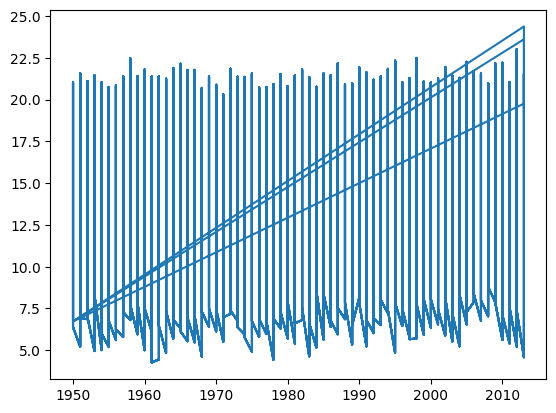

In [171]:
plt.plot(kath_tempfull['date_year'], kath_tempfull['AverageTemperature'])
plt.show()

In [30]:
# i need data from 2000 to 2010
kath_temp = kath[(kath['dt'] >= '2000-01-01') & (kath['dt'] <= '2000-12-31')]
kath_temp1 = kath[(kath['dt'] >= '2000-01-01') & (kath['dt'] <= '2004-12-31')]
kath_temp2 = kath[(kath['dt'] >= '2000-01-01') & (kath['dt'] <= '2009-12-31')]

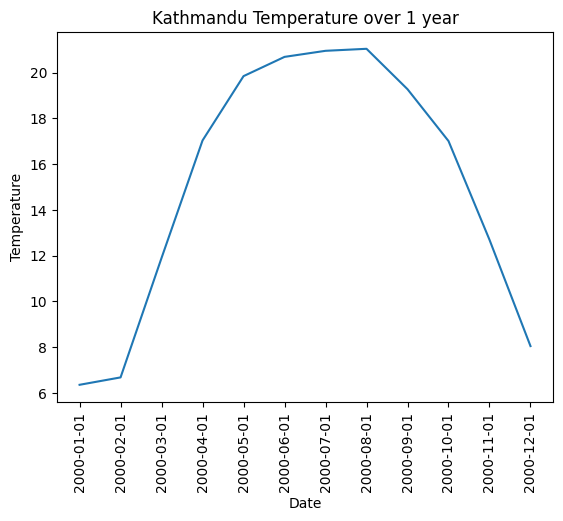

In [35]:
plt.plot(kath_temp['dt'], kath_temp['AverageTemperature'])
plt.xticks(rotation=90)
plt.title('Kathmandu Temperature over 1 year')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.show()

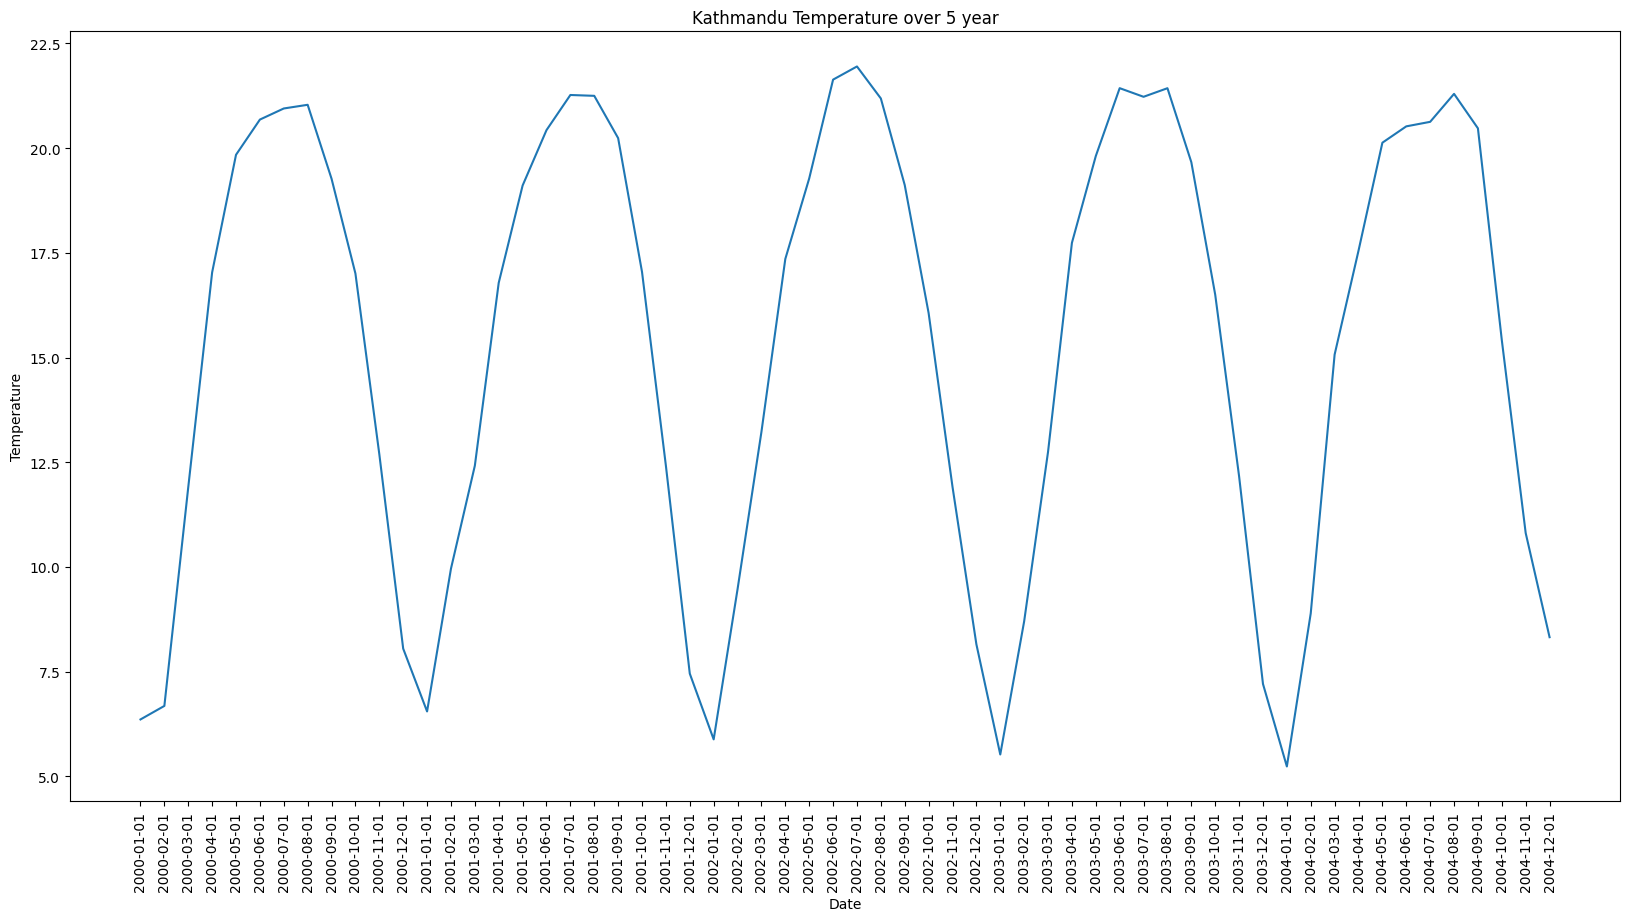

In [42]:
plt.figure(figsize=(20,10))
plt.plot(kath_temp1['dt'], kath_temp1['AverageTemperature'])
plt.xticks(rotation=90)
# stretch x axis to 5 years horizontally

plt.title('Kathmandu Temperature over 5 year')
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.show()

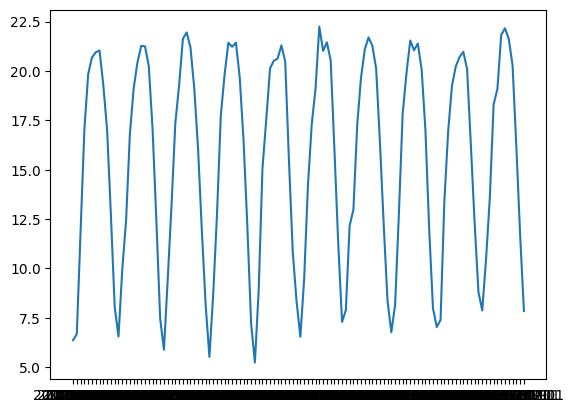

In [33]:
plt.plot(kath_temp2['dt'], kath_temp2['AverageTemperature'])
# plt.x
plt.show()